In [136]:
import pandas as pd
import seaborn as sns

In [137]:
salaries = pd.read_csv('core/Salaries.csv')
battingTotals = pd.read_csv('core/Batting.csv')
players = pd.read_csv('core/People.csv')

## data for salaries begins in 1985, so cut off everything in batting totals before then for batting


battingTotals = battingTotals[battingTotals.yearID >= 1985]
display(battingTotals)

#display(battingTotals[battingTotals.playerID == 'zupofr01'])
display(salaries[salaries.playerID == 'zumayjo01'])

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
62253,aasedo01,1985,1,BAL,AL,54,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62254,abregjo01,1985,1,CHN,NL,6,9,0,0,0,...,1.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
62255,ackerji01,1985,1,TOR,AL,61,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
62256,adamsri02,1985,1,SFN,NL,54,121,12,23,3,...,10.0,1.0,1.0,5,23.0,3.0,1.0,3.0,0.0,2.0
62257,agostju01,1985,1,CHA,AL,54,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104319,zimmejo02,2017,1,DET,AL,29,6,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
104320,zimmery01,2017,1,WAS,NL,144,524,90,159,33,...,108.0,1.0,0.0,44,126.0,1.0,3.0,0.0,5.0,16.0
104321,zobribe01,2017,1,CHN,NL,128,435,58,101,20,...,50.0,2.0,2.0,54,71.0,2.0,2.0,2.0,3.0,13.0
104322,zuninmi01,2017,1,SEA,AL,124,387,52,97,25,...,64.0,1.0,0.0,39,160.0,0.0,8.0,0.0,1.0,8.0


,yearID,teamID,lgID,playerID,salary
17570,2006,DET,AL,zumayjo01,327000
18391,2007,DET,AL,zumayjo01,410000
19236,2008,DET,AL,zumayjo01,420000
20076,2009,DET,AL,zumayjo01,735000
20895,2010,DET,AL,zumayjo01,915000
21723,2011,DET,AL,zumayjo01,1400000


<Axes: xlabel='H', ylabel='salary'>

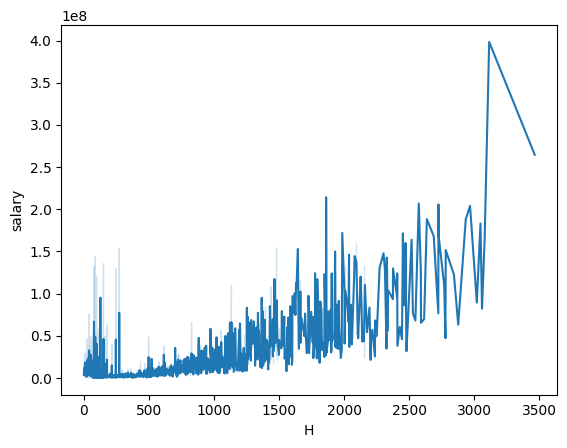

In [138]:
salariesPerPlayer = salaries.groupby('playerID').agg({'salary':'sum'}).reset_index()

battingPerYear = battingTotals[['playerID', 'H', 'yearID']]

battingPerPlayer = battingPerYear.groupby('playerID').agg({'H':'sum'}).reset_index()

salariesAndHits = pd.merge(battingPerPlayer, salariesPerPlayer, on='playerID')

#display(salariesAndHits)


sns.lineplot(x='H', y='salary', data=salariesAndHits)


#sns.scatterplot(x='playerID', y='salary', data=totalPlayerSalaries)

In [139]:
display(salariesAndHits[salariesAndHits.H > 4000])
display(players[players.playerID == 'rosepe01'])
display(salaries[salaries.playerID == 'rosepe01'])
display(salaries)

,playerID,H,salary


,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
15057,rosepe01,1941.0,4.0,14.0,USA,OH,Cincinnati,NaN,NaN,NaN,...,Rose,Peter Edward,192.0,71.0,B,R,1963-04-08,1986-08-17,rosep001,rosepe01


,yearID,teamID,lgID,playerID,salary
156,1985,CIN,NL,rosepe01,358858
751,1986,CIN,NL,rosepe01,1000000


,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
26423,2016,WAS,NL,strasst01,10400000
26424,2016,WAS,NL,taylomi02,524000
26425,2016,WAS,NL,treinbl01,524900
26426,2016,WAS,NL,werthja01,21733615
